In [10]:
from googleapiclient.discovery import build
from dateutil import parser
import pandas as pd
from IPython.display import JSON

# Data viz packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to C:\Users\Christopher
[nltk_data]     Turner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Christopher
[nltk_data]     Turner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
channel_ids= ['UCvAD3EQC4-_oEIThqMhWOAQ',
              # other channels if want
             ]

In [31]:
api_key = 'find yours by searching youtube api'

In [32]:
api_service_name = "youtube"
api_version = "v3"


    # Get credentials and create an API client
  
youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [40]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids)
    )
    response = request.execute()
    
    #loop through items
    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
                'subscribers': item['statistics']['subscriberCount'],
                'views': item['statistics']['viewCount'],
                'totalVideos': item['statistics']['videoCount'],
                'playlistId': item['contentDetails']['relatedPlaylists']['uploads']
        }
        all_data.append(data)
        
    return pd.DataFrame(all_data)


def get_video_ids(youtube, playlist_id):
    
    video_ids = []
    
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=playlist_id,
        maxResults = 50
    )
    response = request.execute()
    
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    while next_page_token is not None:
        request = youtube.playlistItems().list(
            part='contentDetails',
            playlistId = playlist_id,
            maxResults = 50,
            pageToken = next_page_token)
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])

        next_page_token = response.get('nextPageToken')
        
    return video_ids
    
    
def get_video_details(youtube, video_ids):

    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
    
    return pd.DataFrame(all_video_info)


In [41]:
channel_stats = get_channel_stats(youtube, channel_ids)
channel_stats

,channelName,subscribers,views,totalVideos,playlistId
0,TacticalRab,106000,82190276,3256,UUvAD3EQC4-_oEIThqMhWOAQ


In [45]:
playlist_id = "UUvAD3EQC4-_oEIThqMhWOAQ"

In [47]:
# Get video IDs
video_ids = get_video_ids(youtube, playlist_id)

In [48]:
# Get video details
video_df = get_video_details(youtube, video_ids)
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,HP-_c-j0nF0,TacticalRab,ZooMaa EXPOSES CDL Coach Drama: Faked Thumb In...,Follow me on Insta: https://www.instagram.com/...,"[News, optic gaming, optic, scump, formal, cri...",2024-01-11T21:00:10Z,4384,271,None,74,PT13M46S,hd,false
1,Hi2Cv37DiY4,TacticalRab,"Shotzzy SLAMS Hecz, Pred vs HyDra, OpTic Scrim...",Follow me on Insta: https://www.instagram.com/...,"[News, optic gaming, optic, scump, formal, cri...",2024-01-11T14:00:23Z,22029,707,None,117,PT13M27S,hd,false
2,hnSeHfmTM9U,TacticalRab,Scump Explains CDL Return CHALKED: OpTic Texas...,Follow me on Insta: https://www.instagram.com/...,"[News, optic gaming, optic, scump, formal, cri...",2024-01-10T21:00:32Z,23305,647,None,88,PT14M3S,hd,false
3,e9DtVePMNPw,TacticalRab,Octane EXPOSES CDL Cheating: Scrappy Dodgy in ...,Follow me on Insta: https://www.instagram.com/...,"[News, optic gaming, optic, scump, formal, cri...",2024-01-10T14:00:34Z,24489,720,None,106,PT14M33S,hd,false
4,ZBtpDNIvCqs,TacticalRab,"TJHaLy SLAMS ""Pathetic"" Pros Breaking GAs, Sho...",Follow me on Insta: https://www.instagram.com/...,"[News, optic gaming, optic, scump, formal, cri...",2024-01-09T21:00:14Z,22795,618,None,78,PT13M20S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,fqQhevGOMBo,TacticalRab,BO2 Tactics & Strategies | 40+ Gun Only Team D...,I'd greatly appreciate a 'LIKE' rating if you ...,"[tutorial, competitive, hardpoint, ctf, captur...",2014-08-14T09:35:59Z,399,16,None,10,PT6M26S,hd,false
3252,yg21MLFM9lQ,TacticalRab,BO2 Tactics & Strategies | 50+ League Play Har...,I'd greatly appreciate a 'LIKE' rating if you ...,"[tutorial, competitive, hardpoint, ctf, captur...",2014-08-09T15:38:25Z,3382,64,None,18,PT6M31S,sd,false
3253,7PkYurt-9EU,TacticalRab,My Thoughts on Advanced Warfare! | Black Ops G...,I'd greatly appreciate a 'LIKE' rating if you ...,"[Call Of Duty: Black Ops (Video Game), Call Of...",2014-08-07T16:35:30Z,189,10,None,12,PT4M49S,hd,false
3254,P-pFjDZEpng,TacticalRab,BO2 Tactics & Strategies | 17-0 Search and Des...,I'd greatly appreciate a 'LIKE' rating if you ...,"[CoD, TDM, team deathmatch, SnD, S&D, Search a...",2014-08-03T21:03:10Z,2672,91,None,29,PT6M2S,hd,false


In [49]:
#how many upload total 
len(video_ids)

3256

In [ ]:
#Data Processing

In [50]:
# Check for NULL values in col
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [51]:
# Check data types
video_df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [52]:
# Convert count columns to numeric
numeric_cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [53]:
# Publish day in the week
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['pushblishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A")) 

In [55]:
pip install isodate

     ---------------------------------------- 0.0/41.7 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.7 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 41.7/41.7 kB 507.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [56]:
# convert duration to seconds
import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [57]:
video_df[['durationSecs', 'duration']] 

,durationSecs,duration
0,0 days 00:13:46,PT13M46S
1,0 days 00:13:27,PT13M27S
2,0 days 00:14:03,PT14M3S
3,0 days 00:14:33,PT14M33S
4,0 days 00:13:20,PT13M20S
...,...,...
3251,0 days 00:06:26,PT6M26S
3252,0 days 00:06:31,PT6M31S
3253,0 days 00:04:49,PT4M49S
3254,0 days 00:06:02,PT6M2S


In [58]:
# Add tag count
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [59]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagCount
0,HP-_c-j0nF0,TacticalRab,ZooMaa EXPOSES CDL Coach Drama: Faked Thumb In...,Follow me on Insta: https://www.instagram.com/...,"[News, optic gaming, optic, scump, formal, cri...",2024-01-11 21:00:10+00:00,4384.0,271.0,NaN,74.0,PT13M46S,hd,false,Thursday,0 days 00:13:46,54
1,Hi2Cv37DiY4,TacticalRab,"Shotzzy SLAMS Hecz, Pred vs HyDra, OpTic Scrim...",Follow me on Insta: https://www.instagram.com/...,"[News, optic gaming, optic, scump, formal, cri...",2024-01-11 14:00:23+00:00,22029.0,707.0,NaN,117.0,PT13M27S,hd,false,Thursday,0 days 00:13:27,54
2,hnSeHfmTM9U,TacticalRab,Scump Explains CDL Return CHALKED: OpTic Texas...,Follow me on Insta: https://www.instagram.com/...,"[News, optic gaming, optic, scump, formal, cri...",2024-01-10 21:00:32+00:00,23305.0,647.0,NaN,88.0,PT14M3S,hd,false,Wednesday,0 days 00:14:03,54
3,e9DtVePMNPw,TacticalRab,Octane EXPOSES CDL Cheating: Scrappy Dodgy in ...,Follow me on Insta: https://www.instagram.com/...,"[News, optic gaming, optic, scump, formal, cri...",2024-01-10 14:00:34+00:00,24489.0,720.0,NaN,106.0,PT14M33S,hd,false,Wednesday,0 days 00:14:33,54
4,ZBtpDNIvCqs,TacticalRab,"TJHaLy SLAMS ""Pathetic"" Pros Breaking GAs, Sho...",Follow me on Insta: https://www.instagram.com/...,"[News, optic gaming, optic, scump, formal, cri...",2024-01-09 21:00:14+00:00,22795.0,618.0,NaN,78.0,PT13M20S,hd,false,Tuesday,0 days 00:13:20,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,fqQhevGOMBo,TacticalRab,BO2 Tactics & Strategies | 40+ Gun Only Team D...,I'd greatly appreciate a 'LIKE' rating if you ...,"[tutorial, competitive, hardpoint, ctf, captur...",2014-08-14 09:35:59+00:00,399.0,16.0,NaN,10.0,PT6M26S,hd,false,Thursday,0 days 00:06:26,34
3252,yg21MLFM9lQ,TacticalRab,BO2 Tactics & Strategies | 50+ League Play Har...,I'd greatly appreciate a 'LIKE' rating if you ...,"[tutorial, competitive, hardpoint, ctf, captur...",2014-08-09 15:38:25+00:00,3382.0,64.0,NaN,18.0,PT6M31S,sd,false,Saturday,0 days 00:06:31,35
3253,7PkYurt-9EU,TacticalRab,My Thoughts on Advanced Warfare! | Black Ops G...,I'd greatly appreciate a 'LIKE' rating if you ...,"[Call Of Duty: Black Ops (Video Game), Call Of...",2014-08-07 16:35:30+00:00,189.0,10.0,NaN,12.0,PT4M49S,hd,false,Thursday,0 days 00:04:49,9
3254,P-pFjDZEpng,TacticalRab,BO2 Tactics & Strategies | 17-0 Search and Des...,I'd greatly appreciate a 'LIKE' rating if you ...,"[CoD, TDM, team deathmatch, SnD, S&D, Search a...",2014-08-03 21:03:10+00:00,2672.0,91.0,NaN,29.0,PT6M2S,hd,false,Sunday,0 days 00:06:02,20


C:\Users\Christopher Turner\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Christopher Turner\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 127798 (\N{HOT PEPPER}) missing from current font.
  func(*args, **kwargs)
C:\Users\Christopher Turner\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Christopher Turner\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127798 (\N{HOT PEPPER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


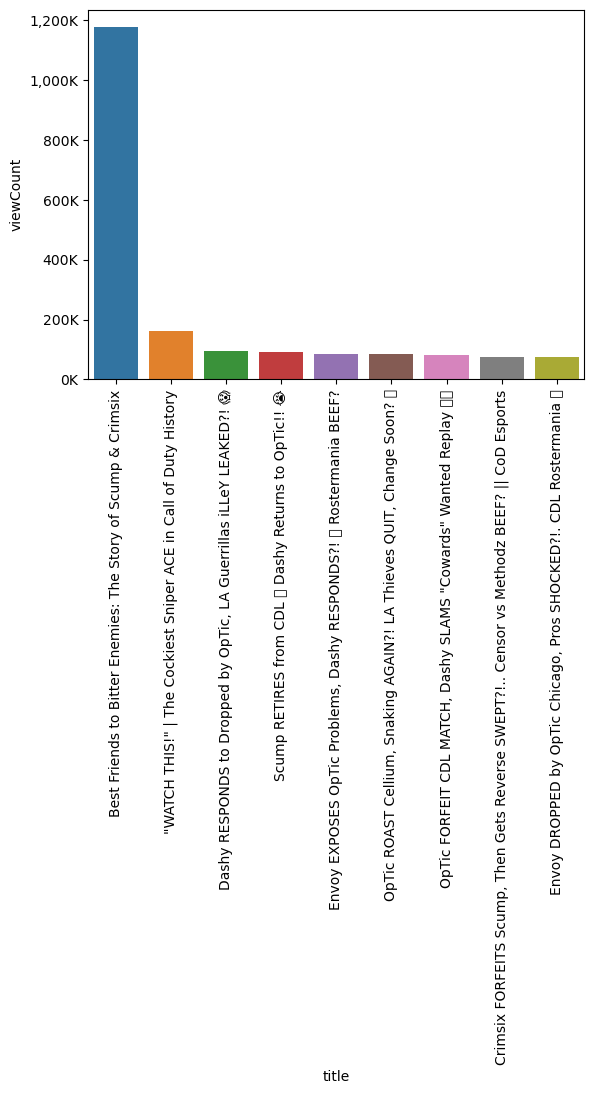

In [60]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

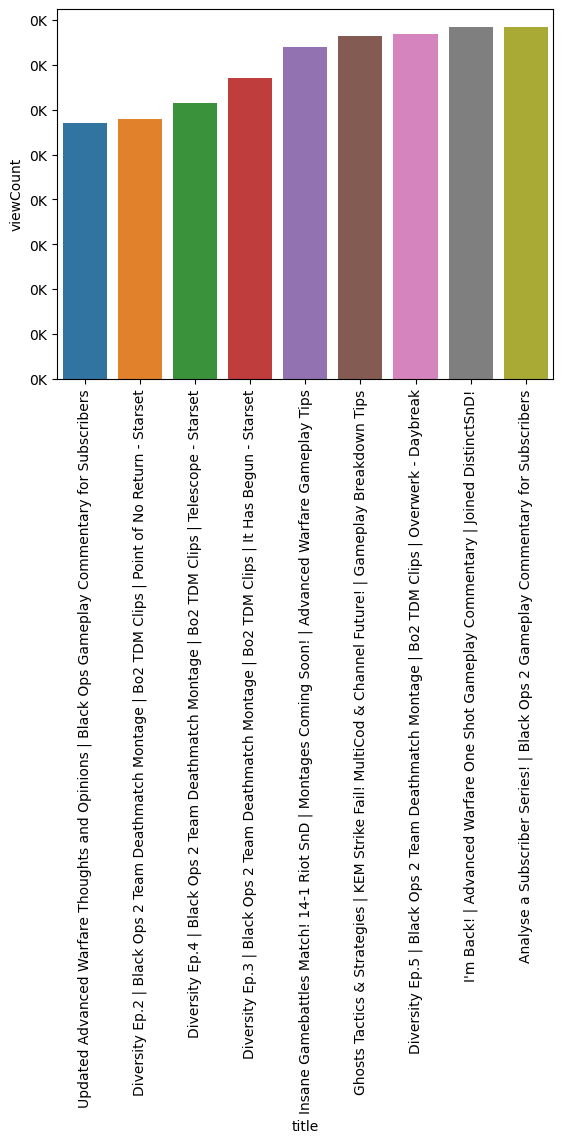

In [61]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

<Axes: xlabel='likeCount', ylabel='viewCount'>

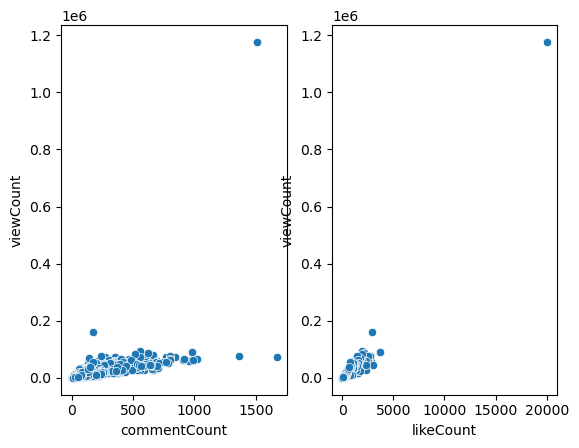

In [62]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = 'commentCount', y = 'viewCount', ax = ax[0])
sns.scatterplot(data = video_df, x = 'likeCount', y = 'viewCount', ax = ax[1])

<Axes: xlabel='durationSecs', ylabel='Count'>

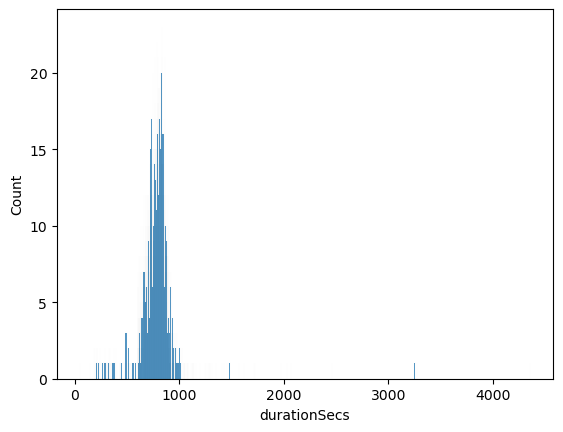

In [63]:
sns.histplot(data = video_df, x = 'durationSecs', bins=30)

In [74]:
day_df = pd.DataFrame(video_df['pushblishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='pushblishDayName', rot=0)

KeyError: 'index'

In [68]:
print(video_df.columns)

Index(['video_id', 'channelTitle', 'title', 'description', 'tags',
       'publishedAt', 'viewCount', 'likeCount', 'favouriteCount',
       'commentCount', 'duration', 'definition', 'caption', 'pushblishDayName',
       'durationSecs', 'tagCount'],
      dtype='object')
